In [9]:
import math
import numpy as numpy
import matplotlib.pyplot as plt
from d2l import mxnet as d2l
from mxnet.gluon import nn
from mxnet import autograd, np, npx, gluon
import warnings
warnings.filterwarnings('ignore')
npx.set_np()

num_points = 12
num_batches = 10
sin_real = np.sin(np.arange(0, num_points, 0.1))

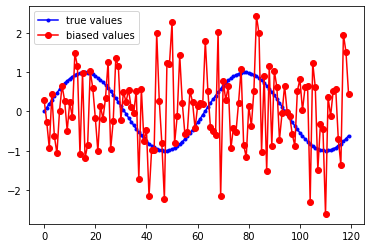

In [10]:
def get_data(w, num_batches):
    X = np.random.normal(0, 1, (num_batches, len(w)))
    y_train = np.sin(X) + np.random.normal(0, 0.001, X.shape)
    return X, y_train.reshape(-1,1)

features, labels = get_data(sin_real, num_batches) # 

plt.plot(sin_real, color='blue', marker='.', label='true values')
plt.plot((features[0]), color='red', marker='o', label='biased values')
plt.legend()
plt.show()

(10, 120) 
 (10, 1)


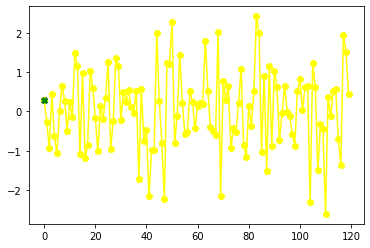

In [11]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = np.array(list(range(num_examples)))
    np.random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = indices[i: min(i + batch_size, num_examples)]
    yield features[batch_indices], labels[batch_indices]

batch_size = 10

for x, y in data_iter(batch_size, features, labels):
    print(x.shape, '\n', y.shape)
    plt.plot(x[0], color='yellow', marker='o')
    plt.plot(y[0], color='green', marker='X')
    break

In [12]:
w = np.random.normal(0, 0.01, size=(x.shape[1], x.shape[0]))
w.attach_grad()
print(w.shape, x.shape, np.dot(x, w).shape)

(120, 10) (10, 120) (10, 10)


In [ ]:
def relu(X):
    return np.maximum(X, 0)
    
def model(X, w):
    return np.dot(X, w)

def sgd(w, lr, batch_size):
    w = w - (w.grad * lr) / batch_size

def loss(y_predicted, y_true):
    return ((y_predicted -  y_true) ** 2) / 2

In [ ]:
# def synthetic_data(w, b, num_examples): #@save
#     """Generate y = Xw + b + noise."""
#     X = np.random.normal(0, 1, (num_examples, len(w)))
#     y = np.dot(X, w) + b
#     y += np.random.normal(0, 0.01, y.shape)
#     return X, y.reshape((-1, 1))

# true_w = np.array([2, -3.4])
# true_b = 4.2
# features, labels = synthetic_data(true_w, true_b, 1000)

In [ ]:
lr = 0.01
epoch = 3

for i in range(epoch):
    for X, y in data_iter(1000, features, labels):
        with autograd.record():
            l = loss(model(X, w), y)
        print(l.shape)
        l.backward()
        sgd(w, lr, batch_size=1000)
    print(loss(model(X, w), y).mean())

In [ ]:
d2l.plt.scatter(d2l.numpy(features[:, 1]), d2l.numpy(labels), 1);

In [15]:
%matplotlib inline
from d2l import mxnet as d2l
from mxnet import autograd, np, npx
import random
npx.set_np()

def synthetic_data(w, b, num_examples): #@save
    """Generate y = Xw + b + noise."""
    X = np.random.normal(0, 1, (num_examples, len(w)))
    y = np.dot(X, w) + b
    y += np.random.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = np.array([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = np.array(indices[i: min(i + batch_size, num_examples)])
    yield features[batch_indices], labels[batch_indices]

batch_size = 10

w = np.random.normal(0, 0.01, (2, 1))
b = np.zeros(1)
w.attach_grad()
b.attach_grad()

def linreg(X, w, b): #@save
    """The linear regression model."""
    return np.dot(X, w) + b

def squared_loss(y_hat, y): #@save
    """Squared loss."""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

def sgd(params, lr, batch_size): #@save
    """Minibatch stochastic gradient descent."""
    for param in params:
        param[:] = param - lr * param.grad / batch_size

lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss


for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        with autograd.record():
            l = loss(net(X, w, b), y) # Minibatch loss in `X` and `y`
        print(l)
        brea
        l.backward()
        sgd([w, b], lr, batch_size) # Update parameters using their gradient
    train_l = loss(net(features, w, b), labels)
    print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

: 

: 